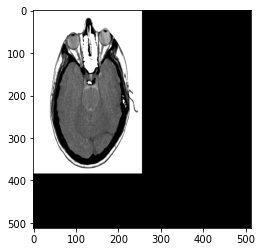

384
256


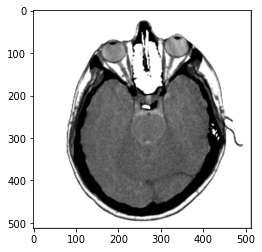

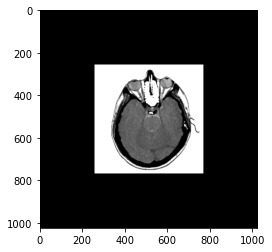

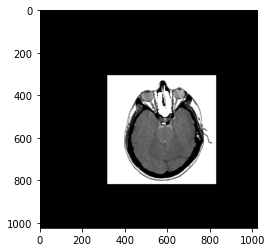

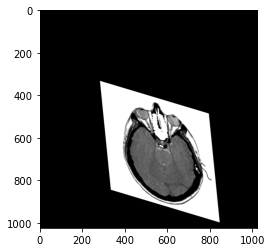

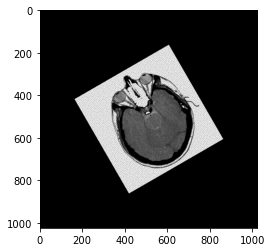

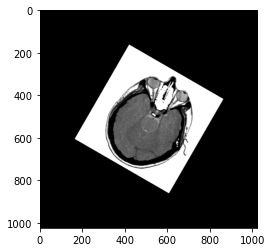

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

#A
img = cv.imread('transformed.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

#B
for i in range (img.shape[0]):
    if img[i , 0] == 0 :
        n = i
        break
for j in range (img.shape[1]):
    if img[0 , j] == 0 :
        m = j
        break
print(n)        
print(m)      
cy = img.shape[0]/n
cx = img.shape[1]/m
SM = np.float32([[cx, 0, 0], [0, cy, 0]])
scaled = cv.warpAffine(img, SM, (img.shape))

plt.imshow(scaled, cmap='gray')
plt.show()

x = scaled.shape[0]
y = scaled.shape[1]

image = cv.copyMakeBorder(scaled, x//2, y//2, x//2, y//2, cv.BORDER_CONSTANT, None, value = 0)
plt.imshow(image, cmap='gray')
plt.show()

#C
x = image.shape[0]
y = image.shape[1]
TM = np.float32([[1, 0, 60], [0, 1, 50]])
translated = cv.warpAffine(image, TM, (x, y))
plt.imshow(translated, cmap='gray')
plt.show()

#D

SM = np.float32([[1, 0.1, 0], [0.3, 1, 0]])
sheared = cv.warpAffine(image, SM, (x, y))
plt.imshow(sheared, cmap='gray')
plt.show()

#E

angle = 30.0
theta = np.radians(angle)
x1 = x//2
y1 = y//2

forward_image  = np.zeros(image.shape, image.dtype)
backward_image = np.zeros(image.shape, image.dtype)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
for i in range(x):
    for j in range(y):
        [x_new, y_new] = np.dot(rotation_matrix, np.array([i - x1, j - y1]))
        x_new = int(np.round(x_new))
        y_new = int(np.round(y_new))
        
        if (x_new + x1 < 0 or x_new + x1 >= x or y_new + y1 < 0 or y_new + y1 >= y):
            continue
        backward_image[i, j] = image[x_new + x1, y_new + y1]  
        forward_image[x_new + x1, y_new + y1] = image[i, j]

plt.imshow(forward_image, cmap='gray')
plt.show()

plt.imshow(backward_image, cmap='gray')
plt.show()